### Probability histograms coin tosses approach normal curve with large number tosses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(1)

#### First, simulate 100 tosses to verify our code

In [2]:
results = np.random.randint(0, 2, size=[10000, 100])
results

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 1, 0]])

In [3]:
results.shape # 10,000 rows with 100 tosses each

(10000, 100)

In [4]:
sums = np.apply_along_axis(lambda a: np.sum(a == 1), 1, results)
sums

array([55, 46, 53, ..., 57, 49, 45])

In [5]:
sums.shape

(10000,)

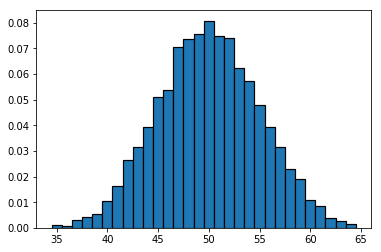

In [6]:
%matplotlib inline

bins = np.arange(35, 66) - 0.5

fig, ax = plt.subplots()
_ = ax.hist(sums, bins, edgecolor='black', linewidth=1.2, density=True)
_ = ax.set_xticks(bins[::5] + 0.5)

In [7]:
%matplotlib inline

np.random.seed(1)

def plot_hist(num_repetitions, num_tosses):
    tosses = np.random.randint(0, 2, size=[num_repetitions, num_tosses])
    sums = np.apply_along_axis(lambda a: np.sum(a == 1), 1, tosses)

    xmin, xmax = min(sums), max(sums)  
    lnspc = np.linspace(xmin, xmax, len(sums))

    m, s = stats.norm.fit(sums) # get mean and standard deviation  
    pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  

    # use a fixed number of bins
    # see: https://stats.stackexchange.com/questions/389590/why-does-increasng-the-sample-size-of-coin-flips-not-improve-the-normal-curve-ap
    bins = 35
    
    #bins = np.arange(xmin, xmax) - 0.5
    #step = int((xmax - xmin)/5)

    fig, ax = plt.subplots()
    _ = ax.hist(sums, bins=35, edgecolor='black', linewidth=1.2, density=True)
    _ = ax.plot(lnspc, pdf_g, label="Norm", color='red')
    #_ = ax.set_xticks(bins[::step] + 0.5)
    #_ = ax.set_title('{:,} tosses - {:,} repetitions'.format(num_tosses, num_repetitions))

### Experiment with increasing number of repetitions (fixed sample size of 1000)

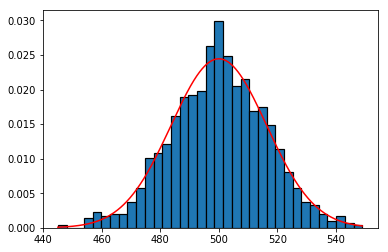

In [8]:
plot_hist(1000, 1000)

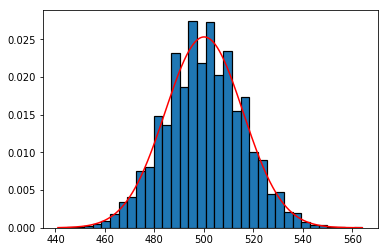

In [9]:
plot_hist(10000, 1000)

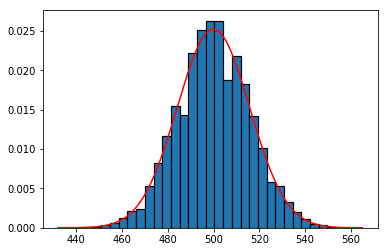

In [10]:
plot_hist(100000, 1000)

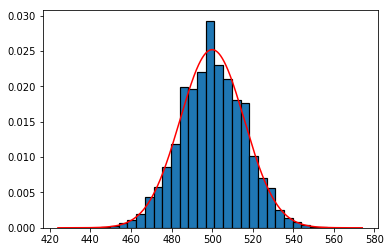

In [11]:
plot_hist(1000000, 1000)

### Experiment with increasing sample size (fixed at 1000 repetitions)

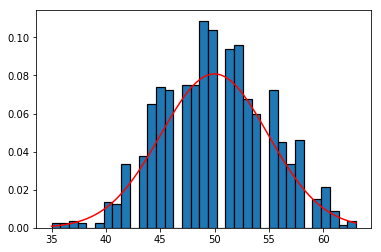

In [12]:
plot_hist(1000, 100)

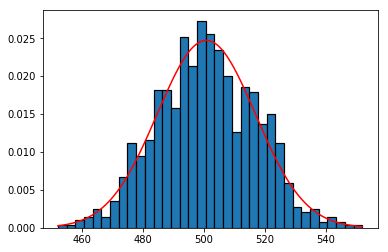

In [13]:
plot_hist(1000, 1000)

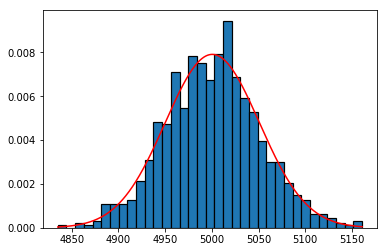

In [14]:
plot_hist(1000, 10000)

### Experiment with increasing sample size (fixed at 10,000 repetitions)

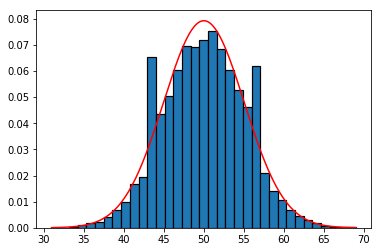

In [15]:
plot_hist(10000, 100)

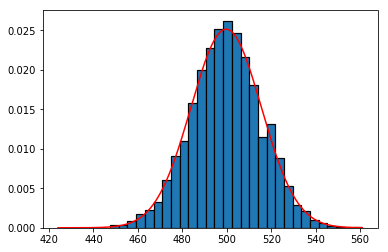

In [16]:
plot_hist(10000, 1000)

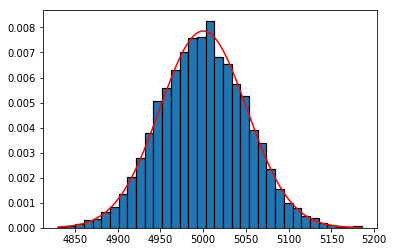

In [17]:
plot_hist(10000, 10000)

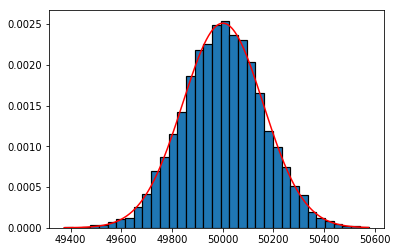

In [18]:
plot_hist(10000, 100000)

### Improvement Opportunities

Already improved to use a fixed number of bins - [see here](https://stats.stackexchange.com/questions/389590/why-does-increasng-the-sample-size-of-coin-flips-not-improve-the-normal-curve-ap)

Better to use a probability plot? [see here](https://stats.stackexchange.com/questions/389590/why-does-increasng-the-sample-size-of-coin-flips-not-improve-the-normal-curve-ap?noredirect=1#comment731727_389590)

> The probability plot (Chambers et al., 1983) is a graphical technique for assessing whether or not a data set follows a given distribution such as the normal or Weibull. The data are plotted against a theoretical distribution in such a way that the points should form approximately a straight line.
> 
> **Source:** https://www.itl.nist.gov/div898/handbook/eda/section3/probplot.htm